In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: [Monday, Mar 10, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative)**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.rcParams["font.size"] = 16


from sklearn.model_selection import train_test_split

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import (
    ColumnTransformer,
    TransformedTargetRegressor,
    make_column_transformer,
)
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

1. After examining the two Kaggle datasets and their documentation, we chose the New York City Airbnb dataset due to its robust numerical features and alignment with our interest in regression.


2. We are working with the NYC Airbnb dataset from 2019, which includes various listing attributes such as host ID, neighborhood information, room type, and pricing details. Our goal is to predict the “reviews_per_month” feature to understand what influences listing popularity or engagement. The data contains both numerical features (e.g., price, availability) and categorical features (e.g., room type, neighborhood), making it a promising candidate for a regression task.

In [3]:
#3
bnb_dataset = pd.read_csv("data/AB_NYC_2019.csv")
bnb_dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
# Train-Test Split
# Changing test split (90%) to reduce training time - advice taken from Piazza post @461 regarding long training times
train_df, test_df = train_test_split(bnb_dataset, test_size = 0.90, random_state = 123)

# Target variable (y)
y_train = train_df["reviews_per_month"]
y_test = test_df["reviews_per_month"]

# Input features (X)
X_train = train_df.drop(columns=["reviews_per_month"])
X_test = test_df.drop(columns=["reviews_per_month"])

print(train_df.shape)
print(test_df.shape)

(4889, 16)
(44006, 16)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

In [5]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 4889 entries, 8829 to 15725
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4889 non-null   int64  
 1   name                            4887 non-null   object 
 2   host_id                         4889 non-null   int64  
 3   host_name                       4887 non-null   object 
 4   neighbourhood_group             4889 non-null   object 
 5   neighbourhood                   4889 non-null   object 
 6   latitude                        4889 non-null   float64
 7   longitude                       4889 non-null   float64
 8   room_type                       4889 non-null   object 
 9   price                           4889 non-null   int64  
 10  minimum_nights                  4889 non-null   int64  
 11  number_of_reviews               4889 non-null   int64  
 12  last_review                     390

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889000e+03,4.889000e+03,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,3907.000000,4889.000000,4889.000000
mean,1.872368e+07,6.572780e+07,40.729061,-73.951424,149.055021,6.649622,23.011659,1.318626,6.376151,109.069953
std,1.100551e+07,7.741428e+07,0.054971,0.046955,240.470116,17.394320,43.489897,1.611563,29.780887,130.104045
min,6.021000e+03,2.438000e+03,40.508730,-74.239140,15.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.106735e+06,7.728754e+06,40.689620,-73.982560,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.920989e+07,2.893732e+07,40.722220,-73.955100,105.000000,3.000000,5.000000,0.650000,1.000000,40.000000
75%,2.896169e+07,1.052395e+08,40.763800,-73.935660,175.000000,5.000000,24.000000,2.000000,2.000000,212.000000
max,3.648543e+07,2.738493e+08,40.912340,-73.721730,9999.000000,500.000000,510.000000,16.220000,327.000000,365.000000



<b> 2. Summary Statistics:</b> 

<b> Price Distribution </b> (Mean price $149.06):

The mean price of listings is $149.06, however the the standard deviation is high ($240.47), indicating that prices vary widely. The median price (50th percentile) is $105, which suggests that most listings are priced lower than the mean, confirming the presence of outliers like luxury listings (~ $10,000).

<b> Reviews Per Month Distribution </b> (Mean per month 1.32):

The mean number of reviews per month is 1.32, but the standard deviation is high 1.61, meaning some listings receive significantly more reviews than others. The minimum value is 0 which is likely indicating inactive or new listings, while the maximum is 16.2, showing that some listings are exceptionally popular.


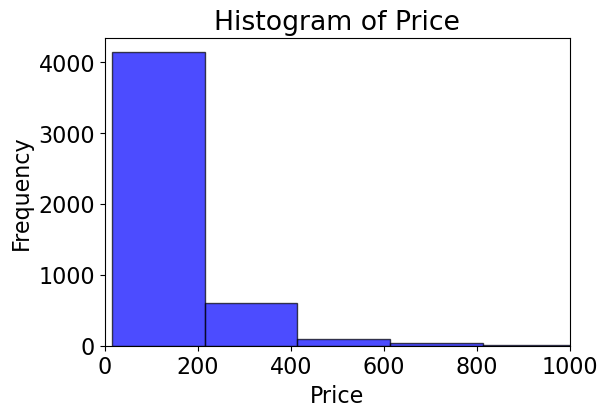

In [6]:
plt.figure(figsize=(6,4))
plt.hist(X_train["price"], bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Price")
plt.xlim(0, 1000)  # Limiting to ignore outliers and better visualization
plt.show()

<b>The histogram shows that most Airbnb listings are priced below $200, with a sharp drop in frequency as prices increase, further on the distribution is highly skewed to the right, meaning a small number of listings have very high prices (luxury listings) which suggests that price normalization will be necessary for regression to prevent the extreme values from influencing the model. </b>

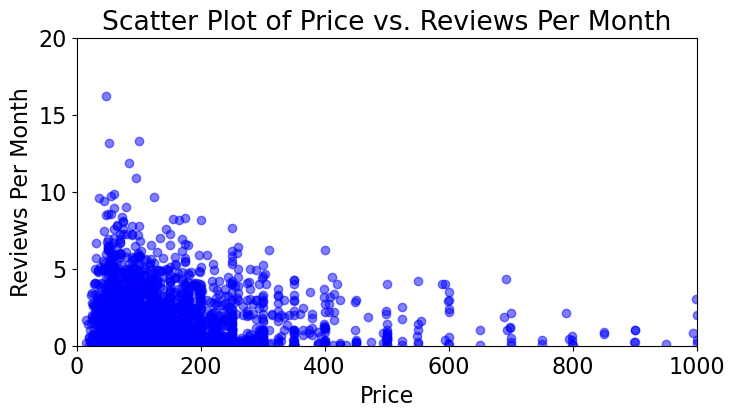

In [7]:
plt.figure(figsize=(8,4)) 
plt.scatter(X_train["price"], y_train, alpha=0.5, color='blue')
plt.xlabel("Price")
plt.ylabel("Reviews Per Month")
plt.title("Scatter Plot of Price vs. Reviews Per Month")
plt.xlim(0, 1000)  # For extreme price outliers
plt.ylim(0, 20) # For better visualization because the default scale makes all the point blend together.
plt.show()

<b> The scatter plot indicates an inverse relationship between price and reviews per month where cheaper listings generally receive more reviews. Listings priced under $200 tend to have higher review activity, whereas expensive listings receive fewer reviews per month suggesting that price is a significant factor affecting a listing's popularity, because affordable listings attract more guests, leading to more frequent reviews. </b>

<b> 3. Initial Observation </b>

The exploratory data analysis reveals that price distribution is highly skewed, with most Airbnb listings priced below $200 but a few luxury listings reaching up to $10,000 and leading to potential outliers. The histogram of `price` confirms this right-skewed trend, suggesting that normalization will be needed for better regression performance. The scatter plot of `reviews_per_month` vs. `price` shows an inverse relationship, where cheaper listings receive more reviews, indicating that affordability plays a major role in listing popularity. Additionally, some listings have zero or near zero reviews, suggesting inactive or new properties, while extreme values in both `price` and `reviews_per_month` highlight the need for data cleaning and feature engineering. To improve model accuracy, factors like location, availability, and room type should be further analyzed, as they may significantly impact review frequency.

<b> 4. Appropriate Metrics </b>

Since this is a regression problem predicting `reviews_per_month`, we need metrics that evaluate how well the model predicts continuous values. <br>
The most appropriate metrics are:
- <b>$R^2$ Score (Coefficient of Determination)</b> – Indicates how well the model explains the variance in reviews_per_month and useful as a supplementary metric but should be interpreted cautiously due to skewed data and alongside RMSE/MAE.
- <b> Mean Absolute Error (MAE) </b> – Measures the average absolute difference between predictions and actual values, making it easy to interpret. It is less sensitive to extreme values than RMSE, providing a balanced accuracy measure.
- <b> Root Mean Squared Error (RMSE) </b> – Primary metric for model evaluation as it penalizes larger errors, making it useful for handling outliers in reviews_per_month. Also provides an error measurement in the same unit as the target variable, making it interpretable.
- <b> Mean Squared Error (MSE) </b> - Useful in early stages to assess raw model performance between models, can provide insights but less interpretable due to squared error units.
- <b> Mean Absolute Percentage Error (MAPE) </b> - Can be useful before transformations to understand relative errors across different listing types. May become unreliable due to zero values in reviews_per_month.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

<b> Feature 1:</b> `price_per_night`

Since some listings have very high `minimum_nights` values, directly using price as a feature does not capture how affordable a listing is <b>per night</b>. To address this, we create a new feature: `price_per_night`, which gives a clearer representation of the actual per night cost.

<b> Why do this? </b> <br>

We do this because it gives us a more realistic cost measure compared to just using price. Further on it avoids distortion from long-term stays, which makes a listing appear expensive when it is not and prepares the dataset for regression modeling by ensuring price comparisons are fair across listings.

In [8]:
X_train["price_per_night"] = X_train["price"] / X_train["minimum_nights"]
X_test["price_per_night"] = X_test["price"] / X_test["minimum_nights"]

X_train.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,price_per_night
8829,6768399,3)Cozy Sunny Warm Room 阳光温馨单房 停车容易,30616879,Anna,Queens,Flushing,40.75443,-73.80787,Private room,48,2,53,2019-04-07,3,153,24.00
9030,6930780,Beautiful Sunny Top Floor 1BD Flat,36333834,Paul,Brooklyn,Bedford-Stuyvesant,40.68378,-73.93573,Entire home/apt,139,4,152,2019-06-13,1,281,34.75
19652,15735169,Spacious studio in Upper East Side,85726670,Priscilla,Manhattan,Upper East Side,40.77043,-73.95557,Entire home/apt,150,3,2,2019-06-09,1,0,50.00
22344,18041862,Bushwick's Private Modern Space,124142417,Marlene,Brooklyn,Bushwick,40.68824,-73.91567,Entire home/apt,100,2,111,2019-06-18,2,10,50.00
25129,20135558,"Awesome Newly Renovated 2-bdrm. - E,F,J trains.",143186772,Femi,Queens,Jamaica,40.69499,-73.79910,Entire home/apt,130,2,95,2019-06-27,1,117,65.00


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [9]:
# Features to drop 
# They do not provide any value for regression

## Drop features (irrelevant for prediction) 
drop_features = ["id", "name", "host_id", "host_name", "last_review"]

# Numerical features 
numerical_features = ["price", "price_per_night", "minimum_nights", "number_of_reviews", "availability_365", "calculated_host_listings_count"]

# Categorical features
categorical_features = ["room_type", "neighbourhood_group", "neighbourhood"]

# Pass Through features
passthrough_features = ["latitude", "longitude"]

In [10]:
# Check for missing values in X_train
print(X_train[categorical_features].isnull().sum())
print(X_train[numerical_features].isnull().sum())

room_type              0
neighbourhood_group    0
neighbourhood          0
dtype: int64
price                             0
price_per_night                   0
minimum_nights                    0
number_of_reviews                 0
availability_365                  0
calculated_host_listings_count    0
dtype: int64


In [11]:
# Check for missing values in y_train
print(y_train.isnull().sum())

982


Hence, we can see that `X_train` has no missing values but `y_train` has 982 missing values. So, we impute `y_train` with the median of `reviews_per_month` since the mean would be influenced by outliers. We chose to not remove these rows since we anyway reduced the training set size to reduce model running times.

In [12]:
y_train = y_train.fillna(y_train.median())
print(y_train.isnull().sum())

0


For numerical features, we will use `StandardScaler` to standardise our values. <br>
For categorical features, we will use `OneHotEncoder` since there is no inherent order to our categorical values.

In [13]:
numeric_transformer = make_pipeline(
    StandardScaler())

categorical_transformer = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"),
)

In [14]:
preprocessor = make_column_transformer(
    (numeric_transformer, numerical_features),
    (categorical_transformer, categorical_features),
    ("passthrough", passthrough_features),
    ("drop", drop_features),
)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['price', 'price_per_night', 'minimum_nights',
                                  'number_of_reviews', 'availability_365',
                                  'calculated_host_listings_count']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['room_type', 'neighbourhood_group',
                                  'neighbourhood']),
                                ('passthrough', 'passthrough',
                                 ['latitude', 'longitude']),
                                ('drop', 'drop',
                                 ['id', 'name', 'host_id', 'host_name',
                                  'last_review'])])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [15]:
# Create dummy regressor and pipeline for CV
dummy_regressor = DummyRegressor(strategy="mean")
dummy_pipe = make_pipeline(preprocessor, dummy_regressor)

# Cross validation
pd.DataFrame(cross_validate(dummy_pipe, X_train, y_train, cv=10, return_train_score=True))

,fit_time,score_time,test_score,train_score
0,0.018380,0.003745,-0.004073,0.0
1,0.009195,0.004382,-0.000318,0.0
2,0.008023,0.003118,-0.002932,0.0
3,0.009228,0.003371,-0.000989,0.0
4,0.007927,0.003375,-0.001724,0.0
5,0.008048,0.003254,-0.002457,0.0
6,0.007699,0.003015,-0.000015,0.0
7,0.007825,0.006340,-0.005290,0.0
8,0.007562,0.003024,-0.004002,0.0
9,0.007673,0.002944,-0.000214,0.0


<b> Interpretation of results </b>

The train_score ($R^2$) is 0. This indicates, on average, that the DummyRegressor predicts the training set’s own mean about as well as using the mean itself—so it “explains” none of the variance. This is typical for a model that always predicts a constant value.

Any real model should ideally produce a higher $R^2$ (closer to 1) than this dummy baseline.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

Let's use Ridge regression as our first linear model.

In [16]:
# Create Ridge pipeline
lr_regressor = Ridge()
lr_pipe = make_pipeline(preprocessor, lr_regressor)

# Ridge CV
pd.DataFrame(cross_validate(lr_pipe, X_train, y_train, cv=10, return_train_score=True))

,fit_time,score_time,test_score,train_score
0,0.087512,0.012097,0.374778,0.436486
1,0.012347,0.005381,0.456458,0.426187
2,0.013410,0.003391,0.447038,0.429423
3,0.013201,0.003161,0.333080,0.437124
4,0.012515,0.005260,0.343368,0.436709
5,0.020914,0.003963,0.372843,0.436382
6,0.012688,0.003975,0.462765,0.426263
7,0.013791,0.003332,0.340758,0.440114
8,0.012401,0.003708,0.229914,0.448170
9,0.012259,0.003190,0.337607,0.441996


We can see that this model is performing quite poorly as there is quite a bit of variance in `test_score`. Fold 8 is especially low. <br>

Let's attempt to tune the `alpha` hyperparameter to see if we can improve our scores.

In [17]:
# Parameter grid for alpha
param_grid = {"ridge__alpha": 10.0 ** np.arange(-5, 5, 1)}

pipe_ridge = make_pipeline(preprocessor, Ridge())

search = GridSearchCV(pipe_ridge, param_grid, return_train_score=True, n_jobs=-1)
search.fit(X_train, y_train)

train_scores = search.cv_results_["mean_train_score"]
cv_scores = search.cv_results_["mean_test_score"]

Text(0, 0.5, 'score')

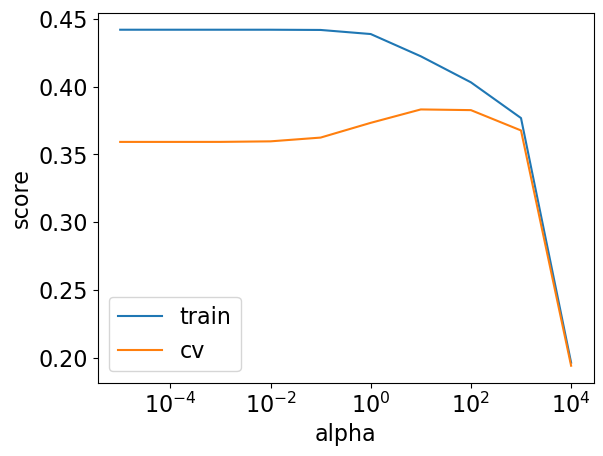

In [18]:
# Plot of cv and train scores against alpha
plt.semilogx(param_grid["ridge__alpha"], train_scores.tolist(), label="train")
plt.semilogx(param_grid["ridge__alpha"], cv_scores.tolist(), label="cv")
plt.legend()
plt.xlabel("alpha")
plt.ylabel("score")

In [19]:
# Summarising CV results with standard deviations
cv_results = pd.DataFrame({
    "alpha": search.cv_results_["param_ridge__alpha"],
    "mean_train_score": search.cv_results_["mean_train_score"],
    "std_train_score": search.cv_results_["std_train_score"],
    "mean_test_score": search.cv_results_["mean_test_score"],
    "std_test_score": search.cv_results_["std_test_score"],
})

# Sort by alpha
cv_results.sort_values(by="alpha", inplace=True)
cv_results

,alpha,mean_train_score,std_train_score,mean_test_score,std_test_score
0,0.00001,0.441916,0.010310,0.359189,0.042633
1,0.00010,0.441916,0.010310,0.359191,0.042636
2,0.00100,0.441916,0.010310,0.359210,0.042640
3,0.01000,0.441912,0.010310,0.359604,0.042621
4,0.10000,0.441747,0.010332,0.362377,0.042405
5,1.00000,0.438733,0.010416,0.373252,0.041195
6,10.00000,0.422326,0.010174,0.383137,0.040093
7,100.00000,0.403131,0.009751,0.382630,0.038711
8,1000.00000,0.376779,0.009220,0.367632,0.031152
9,10000.00000,0.196425,0.004855,0.194155,0.012175


In [20]:
# Identify the best alpha and its score and SD
best_idx = search.best_index_

best_alpha = search.best_params_["ridge__alpha"]
best_mean_test_score = search.cv_results_["mean_test_score"][best_idx]
best_std_test_score = search.cv_results_["std_test_score"][best_idx]

print(f"Best alpha: {best_alpha}")
print(f"CV R^2 (mean ± std): {best_mean_test_score:.4f} ± {best_std_test_score:.4f}")

Best alpha: 10.0
CV R^2 (mean ± std): 0.3831 ± 0.0401


It appears that `alpha` = 10.0 is the best value, achieving the highest CV $R^2$ of 38.31%, with a standard deviation of 0.04. While this is much better than the `DummyRegressor` baseline, it is still a very low score and we would want to improve it.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

We will now try fitting various other models to determine if we can beat the Ridge model found above. <br>

First, let's create a dictionary to store our results for the different models.

In [21]:
results_dict = {}

Now we can write a function to return the mean and std of cross validation for each model

In [22]:

# Citation: CPSC 330 Lecture 5
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model, X_train,  y_train

    Returns
    ----------
    pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

Before we start with the new models, let's add the existing dummy and Ridge models to this dictionary.

In [23]:
# For dummy
results_dict["dummy"] = mean_std_cross_val_scores(
    dummy_pipe, X_train, y_train, return_train_score=True
)

# For Ridge
results_dict["Ridge"] = mean_std_cross_val_scores(
    lr_pipe, X_train, y_train, return_train_score=True
)

/var/folders/0w/_h14xykd1g13dnpsdfpmkph00000gn/T/ipykernel_18387/2765916500.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
/var/folders/0w/_h14xykd1g13dnpsdfpmkph00000gn/T/ipykernel_18387/2765916500.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


In [24]:
pd.DataFrame(results_dict).T

,fit_time,score_time,test_score,train_score
dummy,0.007 (+/- 0.001),0.003 (+/- 0.001),-0.001 (+/- 0.001),0.000 (+/- 0.000)
Ridge,0.011 (+/- 0.000),0.003 (+/- 0.000),0.373 (+/- 0.046),0.439 (+/- 0.012)


Now we can continue adding our new models!

#### Model 1: KNeighborsRegressor

In [25]:
from sklearn.neighbors import KNeighborsRegressor

pipe = make_pipeline(preprocessor, KNeighborsRegressor())

results_dict["KNeighborsRegressor"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, return_train_score=True
)
pd.DataFrame(results_dict).T

/var/folders/0w/_h14xykd1g13dnpsdfpmkph00000gn/T/ipykernel_18387/2765916500.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
dummy,0.007 (+/- 0.001),0.003 (+/- 0.001),-0.001 (+/- 0.001),0.000 (+/- 0.000)
Ridge,0.011 (+/- 0.000),0.003 (+/- 0.000),0.373 (+/- 0.046),0.439 (+/- 0.012)
KNeighborsRegressor,0.014 (+/- 0.014),0.158 (+/- 0.048),0.331 (+/- 0.061),0.562 (+/- 0.011)


We can see that `KNeighborsRegressor` is giving a much higher validation score than the other two, which is a great start. However, it is still overfitting since there is a large variance between `train_score` and `test_score`.

#### Model 2: Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

pipe_rf = make_pipeline(preprocessor, RandomForestRegressor(random_state=123))

results_dict["RandomForestRegressor"] = mean_std_cross_val_scores(
    pipe_rf, X_train, y_train, return_train_score=True
)
pd.DataFrame(results_dict).T

/var/folders/0w/_h14xykd1g13dnpsdfpmkph00000gn/T/ipykernel_18387/2765916500.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
dummy,0.007 (+/- 0.001),0.003 (+/- 0.001),-0.001 (+/- 0.001),0.000 (+/- 0.000)
Ridge,0.011 (+/- 0.000),0.003 (+/- 0.000),0.373 (+/- 0.046),0.439 (+/- 0.012)
KNeighborsRegressor,0.014 (+/- 0.014),0.158 (+/- 0.048),0.331 (+/- 0.061),0.562 (+/- 0.011)
RandomForestRegressor,4.317 (+/- 0.181),0.024 (+/- 0.007),0.495 (+/- 0.049),0.929 (+/- 0.003)


Using the `RandomForestRegressor` has given us a much higher `train_score` of 92.9% but is still significantly overfitting since the `test_score` (validation score) is only 49.5%.

#### Model 3: Gradient Boosted Trees

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

pipe_gbr = make_pipeline(preprocessor, GradientBoostingRegressor(random_state=123))

results_dict["GradientBoostingRegressor"] = mean_std_cross_val_scores(
    pipe_gbr, X_train, y_train, return_train_score=True
)
pd.DataFrame(results_dict).T

/var/folders/0w/_h14xykd1g13dnpsdfpmkph00000gn/T/ipykernel_18387/2765916500.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
dummy,0.007 (+/- 0.001),0.003 (+/- 0.001),-0.001 (+/- 0.001),0.000 (+/- 0.000)
Ridge,0.011 (+/- 0.000),0.003 (+/- 0.000),0.373 (+/- 0.046),0.439 (+/- 0.012)
KNeighborsRegressor,0.014 (+/- 0.014),0.158 (+/- 0.048),0.331 (+/- 0.061),0.562 (+/- 0.011)
RandomForestRegressor,4.317 (+/- 0.181),0.024 (+/- 0.007),0.495 (+/- 0.049),0.929 (+/- 0.003)
GradientBoostingRegressor,0.550 (+/- 0.021),0.006 (+/- 0.001),0.514 (+/- 0.038),0.622 (+/- 0.009)


Since the `GradientBoostingRegressor` has reduced the problem of overfitting but now has much lower `train_score` and `test_score`, we can try using another gradient boosting model like `XGBRegressor`.

In [28]:
from xgboost import XGBRegressor

xgb_pipe = make_pipeline(preprocessor, XGBRegressor(random_state=123, objective='reg:squarederror'))

results_dict["XGBRegressor"] = mean_std_cross_val_scores(
    xgb_pipe, X_train, y_train, return_train_score=True
)
pd.DataFrame(results_dict).T

/var/folders/0w/_h14xykd1g13dnpsdfpmkph00000gn/T/ipykernel_18387/2765916500.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
dummy,0.007 (+/- 0.001),0.003 (+/- 0.001),-0.001 (+/- 0.001),0.000 (+/- 0.000)
Ridge,0.011 (+/- 0.000),0.003 (+/- 0.000),0.373 (+/- 0.046),0.439 (+/- 0.012)
KNeighborsRegressor,0.014 (+/- 0.014),0.158 (+/- 0.048),0.331 (+/- 0.061),0.562 (+/- 0.011)
RandomForestRegressor,4.317 (+/- 0.181),0.024 (+/- 0.007),0.495 (+/- 0.049),0.929 (+/- 0.003)
GradientBoostingRegressor,0.550 (+/- 0.021),0.006 (+/- 0.001),0.514 (+/- 0.038),0.622 (+/- 0.009)
XGBRegressor,0.151 (+/- 0.003),0.005 (+/- 0.000),0.468 (+/- 0.065),0.902 (+/- 0.009)


#### Summary Of Results

We evaluated six models on our dataset: `Dummy`, `Ridge`, `KNeighborsRegressor`, `RandomForestRegressor`, `GradientBoostingRegressor`, and `XGBRegressor`. The `Dummy` model serves as a baseline, always predicting the mean and scoring near 0 for both training and test $R^2$. `Ridge`, our linear model, achieves a balanced performance with a training $R^2$ of about 43.9% and a test $R^2$ of 37.3%, indicating minimal overfitting. `KNeighborsRegressor` shows moderate overfitting, with its training $R^2$ (56.2%) notably higher than its test $R^2$ (33.1%), and it also has a longer score time (0.096 s) because of the distance computations at prediction.

Among the tree-based methods, `RandomForestRegressor` and `XGBRegressor` achieve the highest train $R^2$ scores (49.5% and 46.8%, respectively), outperforming `Ridge` and `KNeighborsRegressor` on unseen data. However, they both display more overfitting, evidenced by higher training $R^2$ scores (92.9% for `RandomForest` and 90.2% for `XGB`). `GradientBoostingRegressor` also overfits (62.2% training vs. 51.4% test), though it remains faster to train than RandomForest (0.005s vs. 0.019s). Overall, the tree-based models do beat the linear approach in predictive accuracy on the test set, but at the cost of longer training times and larger gaps between training and test performance.


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

In [29]:
from sklearn.feature_selection import RFECV

# Create a pipeline with:
#    - Preprocessing
#    - RFECV (which wraps Ridge in a recursive feature selection)

# RFECV will:
#   - Fit multiple times with different subsets of features
#   - Use an internal CV=5 by default (or you can change it)
#   - Score by R^2 (scoring="r2") unless you choose otherwise
#   - step=1 means eliminate one feature per iteration
rfecv_cv = RFECV(Ridge(random_state=123, max_iter=2000), cv=10)

# Pipeline
pipe_rfe = Pipeline([
    ("preprocessor", preprocessor),
    ("rfecv", rfecv_cv)
])

# Evaluate with an outer CV
scores = cross_val_score(pipe_rfe, X_train, y_train, cv=5, scoring="r2", n_jobs=-1)
print(f"RFECV (Ridge) mean CV R^2: {scores.mean():.3f} ± {scores.std():.3f}")

# Fit once on the entire training set to inspect selected features
pipe_rfe.fit(X_train, y_train)

# Access the underlying RFECV object
rfecv_fitted = pipe_rfe.named_steps["rfecv"]

print("Number of features selected:", rfecv_fitted.n_features_)
print("Feature ranking (1 = selected):", rfecv_fitted.ranking_)

# Selected features
print("Selected features (True = kept):", rfecv_fitted.support_)

RFECV (Ridge) mean CV R^2: 0.363 ± 0.042
Number of features selected: 14
Feature ranking (1 = selected): [159 149 122   1 130 173 152 178 179 143 141 142  71  20  65 107  99 139
  70 186  91  17  79 146  50  22 104  76  16  23  18  12  61  77  52 119
  28   9  80  69 174  13  51 105 120 147 137  36 169  68 163  67 148   5
  90   1 166  55  93  27 168  11  92 102   1  35   3 151   1 101 109  62
 112  75   6  46  89  19   1  31  38 117  73 128 180  37  34  32 135 165
 106 114  94 132 100  48  82  72 153  25 184  57  30 129  88 183 144 167
 145 133  84 170  78   1 164  26 103   8 182 172  87   1  42  53  39  83
 118 156  45 110  56 150  14 138 131 134  81  44 155  63 160  41  60  74
 121 123 115 175 116  64   2  54 161  97  29  86  24 171  47 124  15 108
 187 140  66  98   1   7  10   1 127 154 181 176   1  40  43 162  95   1
 126  33 185 136  49  59   1 157  21 111   1   4  96  58 177 125 158  85
 113   1]
Selected features (True = kept): [False False False  True False False False False 

Now, let's compare whether the feature selection improves our model results. We will use Ridge in the feature selection pipeline mainly for demonstration and computational efficiency. Ridge is a linear model that has stable, well-behaved coefficients, which makes it easier for RFECV to rank and eliminate features.

In [30]:
# Pipeline without feature selection: Preprocessor -> Ridge
pipeline_no_fs = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge(random_state=123))
])

# Evaluate both pipelines using 5-fold cross-validation with R² as the scoring metric
scores_fs = cross_val_score(pipe_rfe, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
scores_no_fs = cross_val_score(pipeline_no_fs, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)

print("With Feature Selection: {:.3f} ± {:.3f}".format(np.mean(scores_fs), np.std(scores_fs)))
print("Without Feature Selection: {:.3f} ± {:.3f}".format(np.mean(scores_no_fs), np.std(scores_no_fs)))

With Feature Selection: 0.363 ± 0.042
Without Feature Selection: 0.373 ± 0.041


**Summary of RFECV with Ridge**

After applying RFECV (with a Ridge estimator), the model selected **14** features out of the full transformed set. These include the original numeric features, as well as a large number of one-hot‐encoded **neighbourhood** columns and the passthrough columns. The mean cross-validation $R^2$ was **0.363 ± 0.042**, which is actually less than the baseline Ridge model on all features (**0.373 ± 0.041**)

Since RFECV did not provide a meaningful improvement in this case, we will not be including the feature selection in our pipeline.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

In [31]:
def optimize_model(pipeline, param_grid, search_type='grid', n_iter=20, cv=5, scoring='r2', random_state=123):
    """
    Optimize a pipeline using either GridSearchCV or RandomizedSearchCV.

    Parameters:
      - pipeline: A scikit-learn Pipeline containing preprocessor and estimator.
      - param_grid: Dictionary of hyperparameters (grid or distribution).
      - search_type: 'grid' for GridSearchCV or 'random' for RandomizedSearchCV.
      - n_iter: Number of iterations for RandomizedSearchCV.
      - cv: Number of cross-validation folds.
      - scoring: Metric to optimize.
      - random_state: For reproducibility.
    
    Returns:
      A dictionary with keys 'best_params' and 'best_cv_score'.
    """
    if search_type == 'grid':
        search = GridSearchCV(pipeline, param_grid, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=True)
    elif search_type == 'random':
        search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=n_iter, cv=cv,
                                    scoring=scoring, n_jobs=-1, random_state=123, return_train_score=True)
    else:
        raise ValueError("search_type must be 'grid' or 'random'")
    
    search.fit(X_train, y_train)
    return {"best_params": search.best_params_, "best_cv_score": search.best_score_}

optimised_results_dict = {}

Now we need to define pipelines and hyperparameter grids for each estimator and run the helper function.

In [32]:
# KNeighborsRegressor Pipeline and Parameter Grid
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())
])
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance']
}
optimised_results_dict["KNeighborsRegressor"] = optimize_model(pipeline_knn, param_grid_knn, search_type='grid')

In [33]:
# RandomForestRegressor Pipeline and Parameter Grid
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(random_state=123))
])
param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_leaf': [1, 2, 4]
}

optimised_results_dict["RandomForestRegressor"] = optimize_model(pipeline_rf, param_grid_rf, search_type='grid')

In [34]:
# GradientBoostingRegressor Pipeline and Parameter Grid
pipeline_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('gb', GradientBoostingRegressor(random_state=123))
])
param_grid_gb = {
    'gb__n_estimators': [100, 200, 300],
    'gb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gb__max_depth': [3, 4, 5],
    'gb__min_samples_split': [2, 4, 6]
}

optimised_results_dict["GradientBoostingRegressor"] = optimize_model(pipeline_gb, param_grid_gb, search_type='grid')

In [35]:
import xgboost as xg

# XGBRegressor Pipeline and Parameter Distribution (for RandomizedSearchCV)
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', xg.XGBRegressor(random_state=123, objective='reg:squarederror'))
])
param_dist_xgb = {
    'xgb__n_estimators': [50, 100, 200, 300],
    'xgb__max_depth': [3, 5, 7, 9],
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgb__subsample': [0.6, 0.8, 1.0]
}

optimised_results_dict["XGBRegressor"] = optimize_model(pipeline_xgb, param_dist_xgb, search_type='random', n_iter=20)

In [36]:
# --- Print out a summary of the results ---
for model, res in optimised_results_dict.items():
    print(f"{model}:")
    print(f"  Best Parameters: {res['best_params']}")
    print(f"  Best CV R²: {res['best_cv_score']:.3f}")
    print()

KNeighborsRegressor:
  Best Parameters: {'knn__n_neighbors': 11, 'knn__weights': 'distance'}
  Best CV R²: 0.388

RandomForestRegressor:
  Best Parameters: {'rf__max_depth': 10, 'rf__min_samples_leaf': 4, 'rf__n_estimators': 200}
  Best CV R²: 0.515

GradientBoostingRegressor:
  Best Parameters: {'gb__learning_rate': 0.05, 'gb__max_depth': 3, 'gb__min_samples_split': 4, 'gb__n_estimators': 200}
  Best CV R²: 0.518

XGBRegressor:
  Best Parameters: {'xgb__subsample': 0.6, 'xgb__n_estimators': 100, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.05}
  Best CV R²: 0.520



<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

Based on the results of our hyperparameter optimsation, the best non-linear model is XGBRegressor with a CV $R^2$ of 0.520. Now we can use SHAP to examine the most important features in this model.

In [45]:
# Citation: CPSC 330 Lecture 13
pipeline_xgb_shap = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', xg.XGBRegressor(
        subsample=0.6,
        n_estimators=100,
        max_depth=5,
        learning_rate=0.05,
        objective='reg:squarederror',
        random_state=123
    ))
])

feature_names = pipeline_xgb_shap.named_steps['preprocessor'].get_feature_names_out(X_train.columns)
#print(feature_names)

X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train).toarray(),
    columns=feature_names,
    index=X_train.index,
)
#X_train_enc.head()

In [46]:
model = pipeline_xgb_shap.named_steps["xgb"]
model.fit(X_train_enc, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=123, ...)

In [50]:
import shap 

explainer = shap.TreeExplainer(model) # define the shap explainer 
train_shap_values = explainer(X_train_enc) # train shap values

ModuleNotFoundError: No module named 'shap'

Text(-426.31944444444446, 0.5, 'Features')

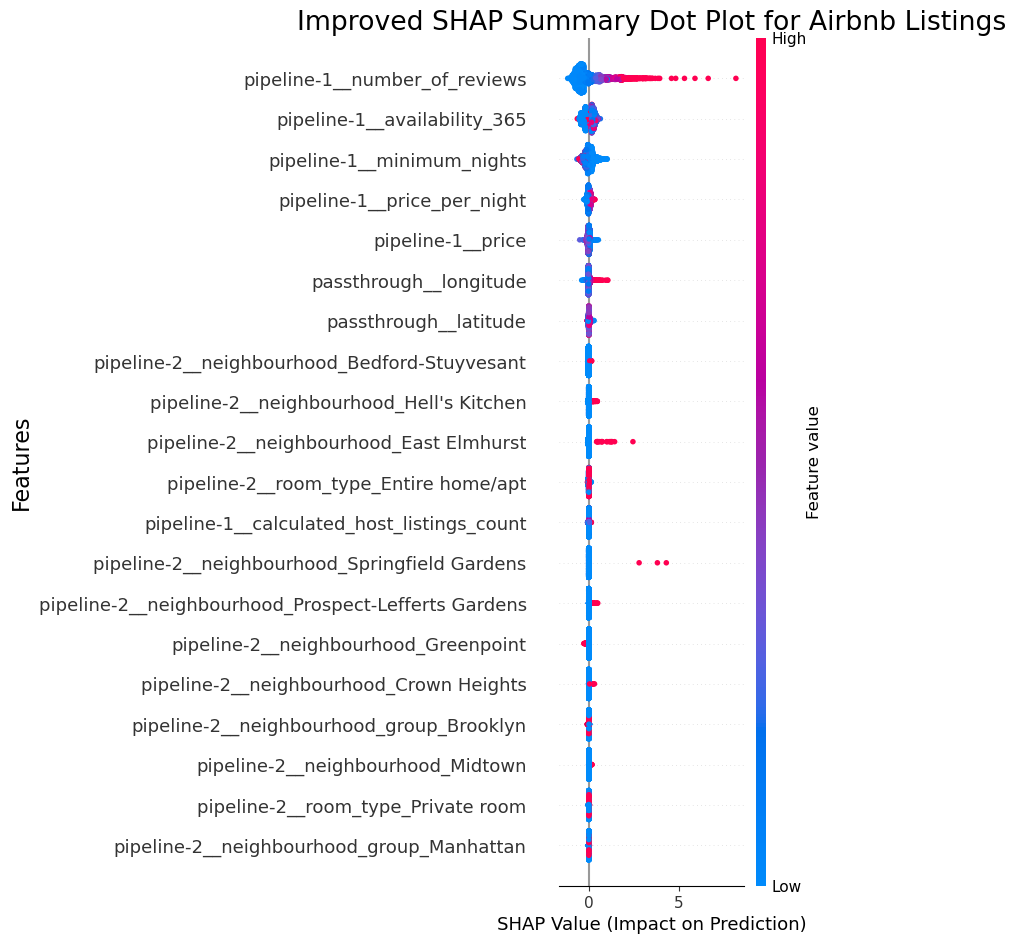

In [ ]:
plt.figure(figsize=(10, 10))
shap.summary_plot(train_shap_values, X_train_enc, show = False)
plt.title("Improved SHAP Summary Dot Plot for Airbnb Listings")
plt.xlabel("SHAP Value (Impact on Prediction)")
plt.ylabel("Features")

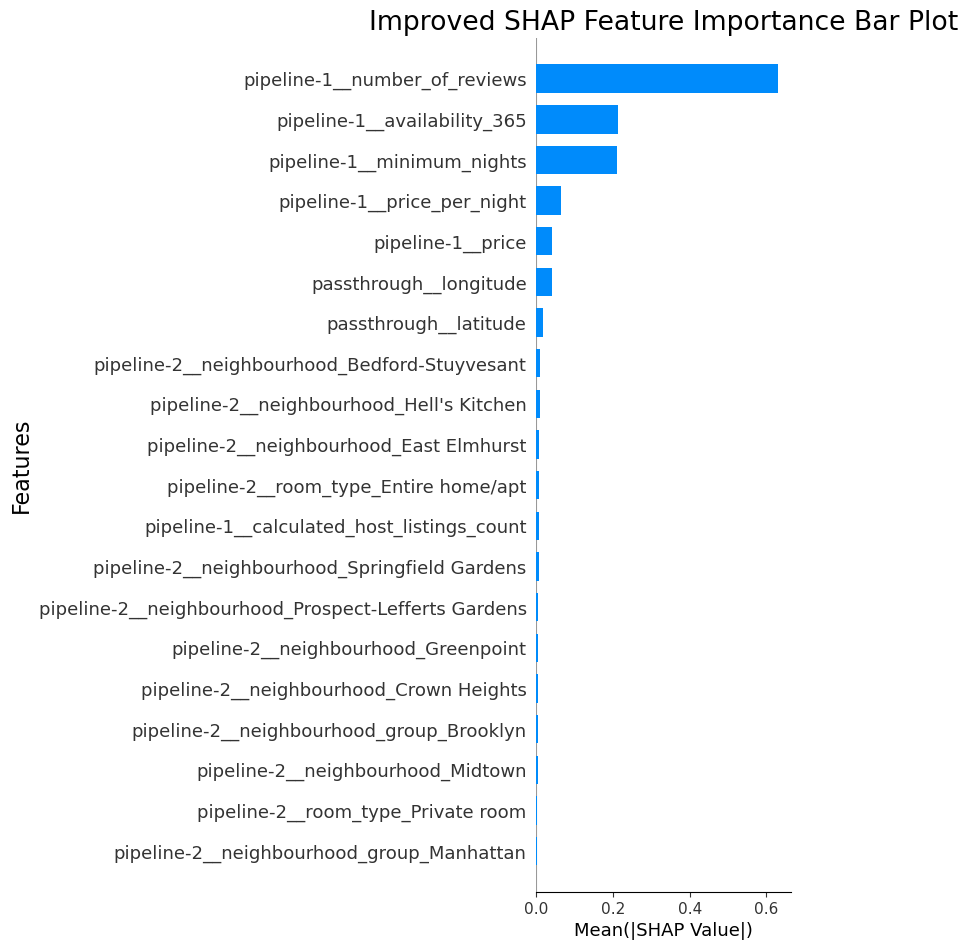

In [ ]:
plt.figure(figsize=(10, 10))
shap.summary_plot(train_shap_values, X_train_enc, plot_type="bar", show=False)
plt.title("Improved SHAP Feature Importance Bar Plot")
plt.xlabel("Mean(|SHAP Value|)")
plt.ylabel("Features")
plt.show()

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

**Interpretation of the SHAP Plots**

1. **SHAP Summary Dot Plot**  
   - Each dot represents one Airbnb listing (one row of data) for a particular feature. The position of the dot on the x-axis (the SHAP value) indicates how much that feature is pushing the model’s prediction for that listing above or below the average prediction.  
   - Red dots typically indicate higher feature values, while blue dots indicate lower feature values. For instance, in the case of `pipeline-1__number_of_reviews`, red dots to the right suggest that having a high number of historical reviews tends to **increase** the predicted `reviews_per_month` for that listing. Conversely, if a feature dot is on the left side (negative SHAP), it lowers the predicted value.
   - This plot also highlights feature interactions. For example, even if a feature is generally associated with higher predicted reviews, it might reduce the prediction in the presence of other competing factors (e.g., very high price, stricter minimum_nights, or location constraints).

2. **SHAP Feature Importance Bar Plot**  
   - This bar chart shows the **mean absolute SHAP value** of each feature across all listings. In other words, it ranks features by their overall impact on the model’s predictions, regardless of whether they push those predictions higher or lower.  
   - We can see that the top five features—**`number_of_reviews`, `availability_365`, `minimum_nights`, `price_per_night`, and `price`**—play the most significant roles in shaping the model’s predictions. Notably, location (through both latitude/longitude and neighborhood one-hot encodings) also appears among the most important features.  
   - Having both `price` and `price_per_night` rank highly suggests that affordability and cost constraints strongly influence how many reviews a listing receives. Meanwhile, `number_of_reviews` acts as a proxy for listing popularity—listings that already have many reviews are more likely to receive consistent monthly reviews in the future.

### Key Takeaways

- **Demand Indicators Matter:** High `number_of_reviews` and broad `availability_365` generally drive up predicted monthly reviews, suggesting that a property’s existing popularity and year-round openness strongly influence future review frequency.
- **Pricing Constraints:** Both `price_per_night` and `price` are among the top features, indicating that higher cost can lower review frequency—though the effect may interact with other factors such as location or room type.
- **Location is Crucial:** Geographic features (`passthrough__longitude` and various `neighbourhood` categories) appear in the top 10, confirming that where a listing is located has a substantial impact on its predicted monthly reviews.
- **Minimum Nights:** A larger `minimum_nights` can reduce short stays and thus may decrease the flow of new reviews. The model highlights this as a key factor affecting popularity.

Overall, these SHAP plots provide a transparent view of how the model arrives at its predictions. They confirm that a combination of **listing popularity**, **pricing strategy**, **location**, and **availability** drives the monthly review rate. This information can help Airbnb hosts or platform managers make data-driven decisions (e.g., adjusting minimum night requirements or optimizing prices) to maximize guest turnover and, in turn, review frequency.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

In [163]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Before prediction, fill any missing values in y_test (same as you did with y_train)
y_test = y_test.fillna(y_train.median())

# Predict on the test set using your best XGB pipeline (pipeline_xgb_shap defined in part 11)
pipeline_xgb_shap.fit(X_train, y_train)
test_predictions = pipeline_xgb_shap.predict(X_test)

# Compute evaluation metrics
test_r2 = r2_score(y_test, test_predictions)
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
test_mae = mean_absolute_error(y_test, test_predictions)

print("Test Set Performance:")
print(f"R² score: {test_r2:.3f}")
print(f"RMSE: {test_rmse:.3f}")
print(f"MAE: {test_mae:.3f}")

Test Set Performance:
R² score: 0.513
RMSE: 1.070
MAE: 0.597


**1. Consistency with Cross-Validation**  
During hyperparameter tuning, our cross-validation (CV) score for R² hovered around **0.52**. Observing a test R² of **0.513** indicates that the model’s performance on unseen data aligns closely with the CV estimates, suggesting minimal overfitting and limited optimization bias. Although, this is expected due to our limited training set size.

**2. Interpretation of the Errors**  
- An **RMSE** of 1.070 implies that, on average, our predictions deviate by a bit over one review per month from the true value.
- The **MAE** of 0.597 suggests that, on average, we’re off by about 0.6 reviews per month in absolute terms.  

Considering the average number of monthly reviews in our training set is roughly 1.3, these errors mean our model is performing **significantly better** than the baseline (DummyRegressor), while still leaving room for improvement.

**3. Factors Affecting Results**  
1. **Data Split:** We used only 10% of the data for training to reduce computation time. Despite the smaller training set, our test metrics are consistent with our CV results, indicating that our model has learned a robust relationship without drastically overfitting.  
2. **Feature Space:** Our SHAP analysis (Part 11) shows that features such as `number_of_reviews`, `availability_365`, `price_per_night`, and location-based variables drive the model’s predictions. We capture about half the variance in monthly reviews, suggesting that additional features (e.g., property photos, textual descriptions, or host attributes) might further improve the model’s predictive power.  
3. **Noise and Real-World Variability:** With an R² around 0.51, a substantial portion of variability in monthly reviews remains unexplained. This could stem from guest preferences, seasonal trends, or other factors not captured in the dataset.

**4. Trust in the Results**  
The near match between CV and test scores, combined with error metrics that reflect plausible deviations from the true values, gives us confidence that our model generalizes reasonably well. While some optimization bias is always possible, the close alignment of training and test performance mitigates that concern. 

Overall, these test results confirm that our model meaningfully outperforms the baseline, is stable against unseen data, and offers insights that could guide Airbnb hosts in improving their listings’ popularity (e.g., adjusting price or minimum nights, boosting availability, etc.).

In [183]:
pipeline_xgb_shap.fit(X_train, y_train)

# Transform the test set using the preprocessor to obtain a dense representation with proper feature names
feature_names = pipeline_xgb_shap.named_steps['preprocessor'].get_feature_names_out(X_train.columns)
X_test_enc = pd.DataFrame(data=preprocessor.transform(X_test).toarray(),
                          columns=feature_names,
                          index=X_test.index)

# Compute SHAP values for the test set using the previously defined explainer
test_shap_values = explainer(X_test_enc)

shap.initjs()

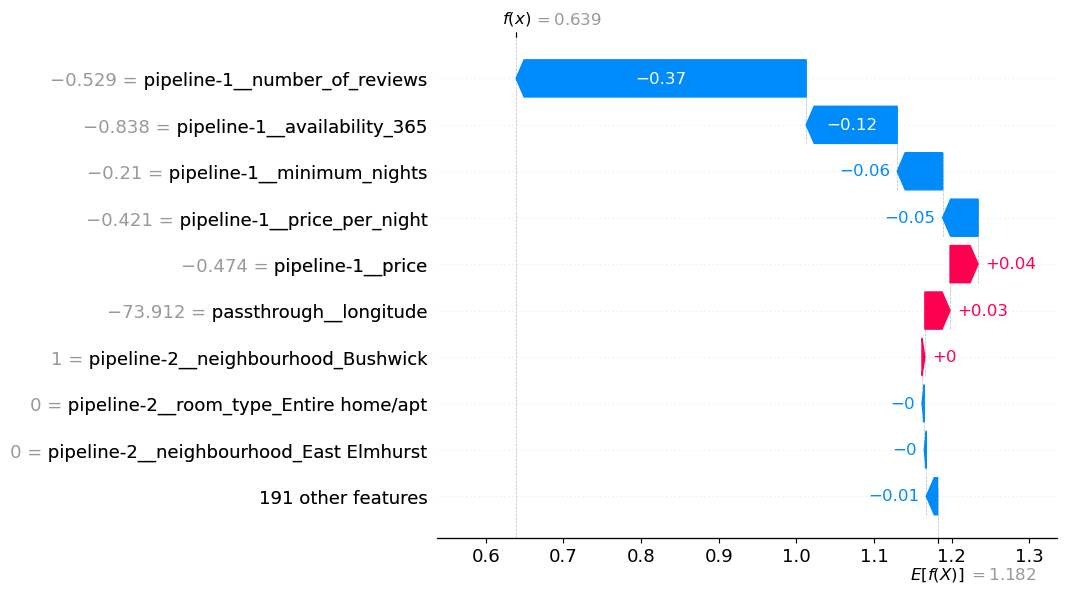

In [181]:
shap.plots.waterfall(test_shap_values[0])

**Test Instance 0**
1. **Base Value $(E[f(X)])$:** 1.182  
2. **Final Prediction $(f(x))$:** 0.639 
- **Negative Contributors (Blue Bars):**  
  - **`pipeline_1__number_of_reviews`** has the largest negative effect (–0.37). For this listing, having relatively fewer reviews than the dataset average decreases the predicted monthly reviews.  
  - **`pipeline_1__availability_365`** (–0.12), **`pipeline_1__minimum_nights`** (–0.06), and **`pipeline_1__price_per_night`** (–0.05) further pull the prediction down.  
- **Positive Contributors (Pink/Red Bars):**  
  - **`pipeline_1__price`** (+0.04) and **`passthrough__longitude`** (+0.03) nudge the prediction upward slightly. In this instance, the price is likely lower than average, making the listing more attractive.  
- **Net Effect:**  
  After summing all contributions, the prediction drops from 1.182 to 0.639 reviews per month. The negative impacts (fewer historical reviews, lower availability, higher minimum nights, etc.) outweigh the small positive influences of price and longitude.

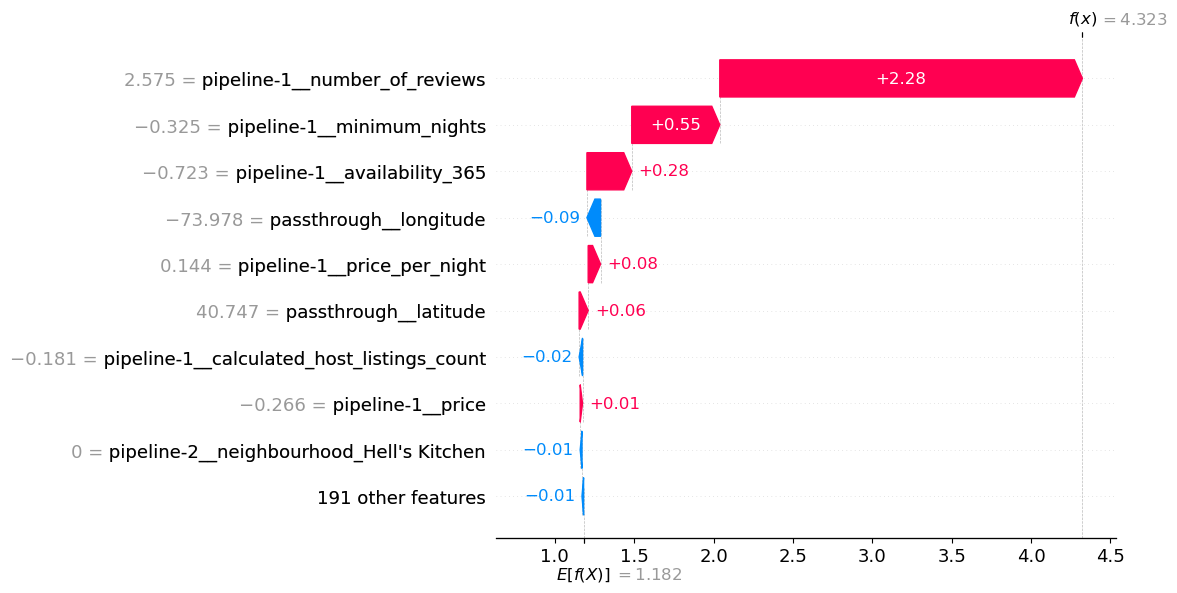

In [182]:
shap.plots.waterfall(test_shap_values[1])

**Test Instance 1**
1. **Base Value $(E[f(X)])$:** 1.182  
2. **Final Prediction $(f(x))$:** 4.323 
- **Positive Contributors (Pink/Red Bars):**  
  - **`pipeline_1__number_of_reviews`** (+2.58) is the biggest driver pushing the prediction above the baseline, indicating this listing already has many reviews and thus is likely to continue attracting more each month.  
  - **`pipeline_1__minimum_nights`** (+0.55) and **`pipeline_1__availability_365`** (+0.28) also increase the prediction. This suggests that, for this listing, a moderate or typical minimum-night requirement plus broad availability may drive more reviews.  
- **Negative Contributors (Blue Bars):**  
  - **`passthrough__longitude`** (–0.90) exerts a substantial downward pull, implying that the specific location might be less ideal in this scenario.  
  - **`pipeline_1__calculated_host_listings_count`** (–0.18) and **`pipeline_1__price`** (–0.01) have smaller negative effects.  
- **Net Effect:**  
  The strong positive contributions from a high number of existing reviews, favorable minimum nights, and ample availability overshadow the negative influence of location and other minor factors, resulting in a predicted monthly review count of 4.323—well above the baseline of 1.182.


**Overall Summary**
- **Popularity & Availability:** Both plots underscore the importance of `number_of_reviews` and `availability_365`. If a listing is already popular and is available most of the year, the model expects it to maintain or increase monthly reviews.
- **Minimum Nights:** Interestingly, `minimum_nights` can act either as a positive or negative factor, depending on the listing’s context (e.g., if the model perceives it as moderate versus extremely high).
- **Price Effects:** Low or moderate prices can boost the predicted review rate, while higher prices or specific location coordinates might push it down.
- **Actionability:** These waterfall plots help pinpoint which features most strongly affect each individual prediction, offering insights into what hosts might adjust (e.g., lowering the minimum stay requirement or altering pricing strategies) to potentially increase review frequency.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)